In [1]:
# Toggles/Switches
feature_scaling = False
normalization = True

In [2]:
# Imports
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

In [3]:
# Load Data
(x_train, y_train), \
  (x_test, y_test) = \
  tf.keras.datasets.mnist.load_data()

# Check data shapes
print("train features shape: ", x_train.shape)
print("train labels shape: ", y_train.shape)
print("test set size: ", len(x_test))
print("Min-max values of single pixel: ", (x_train.min(), x_test.max()))


# Print first training example
print(x_train[0][5]) # print a row in image

#? What can we infer from checking the data?
#* Image greyscaling ranges from 0 - 255
#* Image size is 28 * 28 pixels
#* Training set is 60,000 images
#* Testing set is 10,000 images

train features shape:  (60000, 28, 28)
train labels shape:  (60000,)
test set size:  10000
Min-max values of single pixel:  (0, 255)
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


In [4]:
# Feature Scaling
if feature_scaling:
  x_train, x_test = \
    x_train / x_train.max(), \
    x_test / x_test.max()

# Normalization
if normalization:
  x_train, x_test = \
    (x_train - x_train.mean()) / (x_train.max() - x_train.min()), \
    (x_test - x_test.mean()) / (x_test.max() - x_test.min())

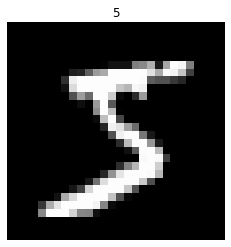

In [14]:
# Visualize Data
index = random.randrange(0, len(x_train))

plt.figure(1)
plt.title(y_train[index])
plt.imshow(x_train[index])
plt.gray()
plt.axis('off')
plt.show()

In [6]:
# TensorFlow solution 1
# Set rand seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  # Flattening the data turns it into a 1D array
  #   Takes the current shape and stacks it (multiply shape)
  #   From (28, 28) -> (, 784)
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(10)
])

# Compile model
model_1.compile(
  # CategoricalCrossentropy must receive one-hot encoded data
  # Hence shape error
  # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

# Fit model
non_norm_history = model_1.fit(
  x_train,
  tf.one_hot(y_train, depth=10),
  epochs=10,
  validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.9072 - accuracy: 0.1011 - val_loss: 7.0010 - val_accuracy: 0.1141
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 7.4969 - accuracy: 0.1053 - val_loss: 5.2910 - val_accuracy: 0.0996
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 7.8279 - accuracy: 0.0989 - val_loss: 8.2393 - val_accuracy: 0.0978
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 8.2561 - accuracy: 0.1001 - val_loss: 8.1784 - val_accuracy: 0.1011
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 8.4693 - accuracy: 0.1024 - val_loss: 8.1993 - val_accuracy: 0.0994
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 8.9933 - accuracy: 0.1017 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy:

In [15]:
# TensorFlow solution 2
# Change: activation function

# Create the model
model_2 = tf.keras.Sequential([
    # Flattening our data turns it into a 1D array
    #   Takes the current shape and stacks it (multiply shape)
    #   In this case (28,28) -> (, 784)
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile model
model_2.compile(
    # CategoricalCrossentropy must receive one-hot encoded data
    # Hence shape error
    # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
non_norm_history_2 = model_2.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2773 - accuracy: 0.5683 - val_loss: 0.8782 - val_accuracy: 0.7400
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7695 - accuracy: 0.7735 - val_loss: 0.6494 - val_accuracy: 0.8211
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6299 - accuracy: 0.8199 - val_loss: 0.5826 - val_accuracy: 0.8379
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5707 - accuracy: 0.8372 - val_loss: 0.5770 - val_accuracy: 0.8421
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5397 - accuracy: 0.8458 - val_loss: 0.5241 - val_accuracy: 0.8541
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5225 - accuracy: 0.8508 - val_loss: 0.5094 - val_accuracy: 0.8592
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5107 - accuracy: 0.8550 - val_loss: 0.5087 - val_accuracy:

In [8]:
# TensorFlow solution 3

# set rand seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_3 = model_3.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7624 - accuracy: 0.7628 - val_loss: 0.4351 - val_accuracy: 0.8724
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4237 - accuracy: 0.8783 - val_loss: 0.3976 - val_accuracy: 0.8866
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3874 - accuracy: 0.8888 - val_loss: 0.3716 - val_accuracy: 0.8930
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3685 - accuracy: 0.8936 - val_loss: 0.3633 - val_accuracy: 0.8958
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3567 - accuracy: 0.8974 - val_loss: 0.3508 - val_accuracy: 0.8988
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3470 - accuracy: 0.8996 - val_loss: 0.3427 - val_accuracy: 0.9004
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3400 - accuracy: 0.9024 - val_loss: 0.3501 - val_accuracy:

In [9]:
# TensorFlow solution 4

# set rand seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_4 = model_4.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5864 - accuracy: 0.8194 - val_loss: 0.3222 - val_accuracy: 0.9047
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3153 - accuracy: 0.9083 - val_loss: 0.2949 - val_accuracy: 0.9167
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.9184 - val_loss: 0.2690 - val_accuracy: 0.9222
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2622 - accuracy: 0.9243 - val_loss: 0.2580 - val_accuracy: 0.9256
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9286 - val_loss: 0.2483 - val_accuracy: 0.9284
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2343 - accuracy: 0.9317 - val_loss: 0.2387 - val_accuracy: 0.9279
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2250 - accuracy: 0.9339 - val_loss: 0.2261 - val_accuracy:

In [16]:
# TensorFlow solution 5

# set rand seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_5 = model_5.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2423 - accuracy: 0.9284 - val_loss: 0.1304 - val_accuracy: 0.9600
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1048 - accuracy: 0.9678 - val_loss: 0.1186 - val_accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0754 - accuracy: 0.9768 - val_loss: 0.0772 - val_accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0820 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0464 - accuracy: 0.9848 - val_loss: 0.1063 - val_accuracy: 0.9690
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0847 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0323 - accuracy: 0.9890 - val_loss: 0.0832 - val_accuracy:

In [11]:
# Test model 5
y_probs = model_5.predict(x_test)
y_test[0], y_probs[0]

(7,
 array([5.6097293e-13, 3.8742887e-10, 4.6116844e-09, 1.5496454e-06,
        3.2859157e-10, 3.0175769e-09, 3.0935848e-11, 9.9999511e-01,
        2.3807161e-09, 3.3545682e-06], dtype=float32))